# DataFestAfrica January Challenge
> On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

> Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


## Import Libraries

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# This function loads in the dataset
def load_data():
    df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
    return df

In [4]:
# I made a copy of the dataset to preserve the origanal dataset
data = load_data().copy()

In [5]:
# Checking the first five rows of the dataset
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
# Checking for duplicates in the dataset
data[data.duplicated()]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


In [7]:
# Checking for duplicates in the dataset
data.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [8]:
data.shape

(5000, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [10]:
# Quick statistical summary of the dataset
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [11]:
data.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


In [12]:
# Now convert date column to datetime format, pick up the calculation from there
data.created_at = pd.to_datetime(data.created_at)

# Rename created_at column to Date
data = data.rename(columns={"created_at": "date"})

In [13]:
# create year, month and day from the created_at column
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day

In [14]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,date,year,month,day
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017,3,13
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017,3,3
2,3,44,861,144,1,cash,2017-03-14 04:23:56,2017,3,14
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017,3,26
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,2017,3,1


There was a $50.2 different between the calculated AOV and the actual AOV

In [15]:
# Accurate Average order value over 30 days
AOV = data.groupby("day")["order_amount"].mean().sum()/ 30
print(f"${round(AOV, 2)}")

$3094.93


In [16]:
# Most Buyers uses credit card mode of payment 
data.payment_method.value_counts()

credit_card    1735
debit          1671
cash           1594
Name: payment_method, dtype: int64

<AxesSubplot:title={'center':'FREQUENT MODE OF PAYMENT'}, xlabel='payment_method', ylabel='Order Amount'>

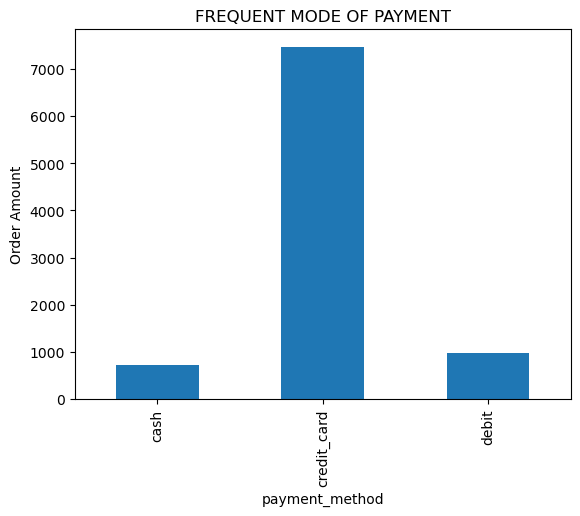

In [17]:
# What mode of payment do buyers use the most
plt.title("Frequent mode of payment".upper())
plt.ylabel("Order Amount")
data.groupby("payment_method")["order_amount"].mean().plot(kind="bar")

The line plot below shows that sales are usually high in the beginning of the month and very high at the end of the month, So sneaker shops might want to focus their advertisment on these period of the month

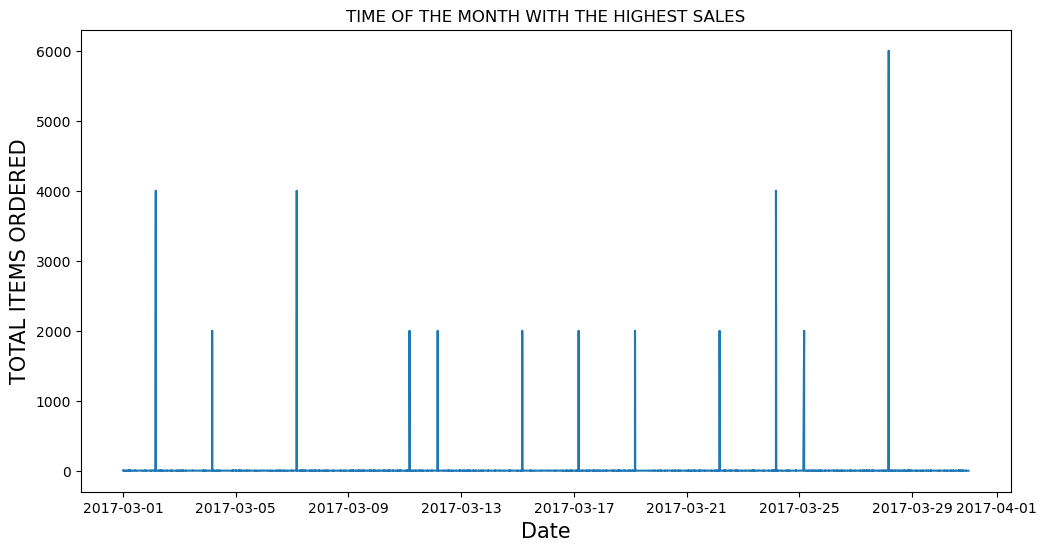

In [23]:
total_item_ordered = data.groupby("date", as_index=False)["total_items"].sum()

# create a line plot of sales data over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Time of the month with the highest sales".upper())
ax.plot(total_item_ordered["date"], total_item_ordered["total_items"])
ax.set_xlabel("Date", fontdict={"fontsize":15})
ax.set_ylabel("Total Items Ordered".upper(), fontdict={"fontsize":15})
#ax.xaxis.set_major_locator(mdates.YearLocator())
plt.show()

In [19]:
# On 30th of the month is the busiest day for the sneaker shops
highest_sales_day = data.groupby("day", as_index=False)["total_items"].sum()
highest_sales_day.max()

day              30
total_items    6354
dtype: int64

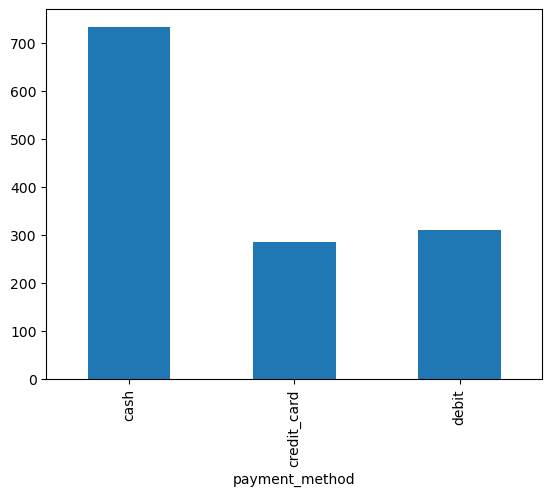

In [20]:
# Buyers uses cash as the frequent mode of payment on the busy day
busy_day = data.query("day == 30").groupby("payment_method")["order_amount"].mean().plot(kind="bar")